In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

# Load the new dataset
df = pd.read_csv('D600 Task 3 Dataset 1 Housing Information.csv')

# Drop the 
df = df.drop(columns=['ID', 'Fireplace', 'HouseColor', 'Garage', 'IsLuxury'])

# Preview th,e data
print("Data Shape:", df.shape)
df.head()

Data Shape: (7000, 17)


,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,PropertyTaxRate,RenovationQuality,LocalAmenities,TransportAccess,Floors,Windows,PreviousSalePrice
0,255614.90,566.62,1.00,4,779.42,20.56,5.62,39.46,10.08,97.29,1.84,4.93,4.44,4.55,1,13,181861.54
1,155586.09,1472.34,1.00,2,656.13,15.62,5.63,40.51,7.89,93.22,0.95,4.08,5.56,6.83,1,17,50042.60
2,131050.83,550.00,1.78,3,754.57,12.47,9.20,48.38,23.74,96.60,1.87,4.26,8.07,8.48,2,34,48400.34
3,151361.71,941.81,2.04,2,439.59,22.22,7.08,94.67,5.22,91.45,1.45,4.45,5.00,6.27,1,14,84594.12
4,113167.61,550.00,1.06,3,353.03,8.28,5.93,16.80,43.13,86.50,1.26,3.36,5.46,6.99,1,21,22934.60


In [26]:


# Remove rows with negative values
initial_rows = df.shape[0]
if 'PreviousSalePrice' in df.columns:
    df = df[df['PreviousSalePrice'] >= 0]
if 'Windows' in df.columns:
    df = df[df['Windows'] >= 0]
removed_rows = initial_rows - df.shape[0]
print(f"Removed {removed_rows} rows with negative values.")

# Check for Nulls
print("\nNull Values:\n", df.isnull().sum())

# Show cleaned dataframe info
print("\nCleaned Data Info:")
df.info()

Removed 78 rows with negative values.

Null Values:
 Price                   0
SquareFootage           0
NumBathrooms            0
NumBedrooms             0
BackyardSpace           0
CrimeRate               0
SchoolRating            0
AgeOfHome               0
DistanceToCityCenter    0
EmploymentRate          0
PropertyTaxRate         0
RenovationQuality       0
LocalAmenities          0
TransportAccess         0
Floors                  0
Windows                 0
PreviousSalePrice       0
dtype: int64

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6922 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 6922 non-null   float64
 1   SquareFootage         6922 non-null   float64
 2   NumBathrooms          6922 non-null   float64
 3   NumBedrooms           6922 non-null   int64  
 4   BackyardSpace         6922 non-null   float64
 5   CrimeRat

In [ ]:
# 1. Standardize the Variables
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled_array, columns=df.columns)

# 2. Save Cleaned Dataset 
df_cleaned = X_scaled.copy()
df_cleaned['Price'] = y
df_cleaned.to_csv('task3_cleaned_data.csv', index=False)
print("File 'task3_cleaned_data.csv' saved successfully.")

# 3. Descriptive Statistics
print("\n--- Descriptive Statistics (Standardized Data) ---")
print(X_scaled.describe().round(2))

File 'task3_cleaned_data.csv' saved successfully.

--- Descriptive Statistics (Standardized Data) ---
        Price  SquareFootage  NumBathrooms  NumBedrooms  BackyardSpace  \
count 6922.00        6922.00       6922.00      6922.00        6922.00   
mean    -0.00          -0.00         -0.00        -0.00           0.00   
std      1.00           1.00          1.00         1.00           1.00   
min     -1.49          -1.18         -1.19        -1.97          -1.82   
25%     -0.77          -0.91         -0.88        -0.99          -0.75   
50%     -0.19          -0.12         -0.14        -0.01          -0.06   
75%      0.56           0.69          0.66         0.97           0.69   
max      4.92           4.28          3.85         3.91           4.00   

       CrimeRate  SchoolRating  AgeOfHome  DistanceToCityCenter  \
count    6922.00       6922.00    6922.00               6922.00   
mean        0.00         -0.00      -0.00                 -0.00   
std         1.00          1.00

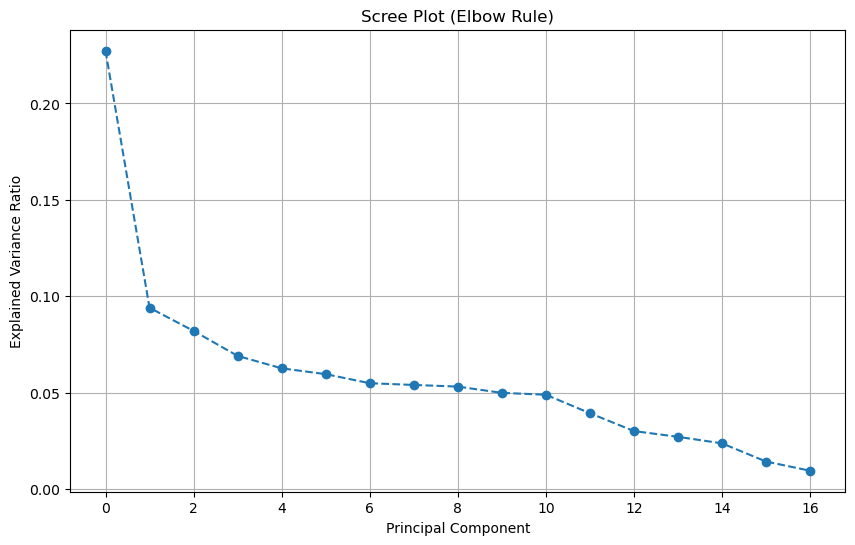


Variance of Components:
      PC  Variance
0    PC0      0.23
1    PC1      0.09
2    PC2      0.08
3    PC3      0.07
4    PC4      0.06
5    PC5      0.06
6    PC6      0.05
7    PC7      0.05
8    PC8      0.05
9    PC9      0.05
10  PC10      0.05
11  PC11      0.04
12  PC12      0.03
13  PC13      0.03
14  PC14      0.02
15  PC15      0.01
16  PC16      0.01

 Loading Matrix
                       PC0   PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8  \
Price                 0.43 -0.01 -0.18 -0.18  0.03 -0.01 -0.01 -0.02 -0.03   
SquareFootage         0.31 -0.01 -0.15 -0.18 -0.09  0.20 -0.11 -0.21  0.18   
NumBathrooms          0.27 -0.01 -0.17 -0.15 -0.12  0.21 -0.03 -0.15  0.20   
NumBedrooms           0.27 -0.00 -0.08  0.04  0.33 -0.38  0.28  0.34 -0.44   
BackyardSpace         0.08  0.01  0.07  0.11 -0.30  0.69  0.46  0.27 -0.34   
CrimeRate            -0.09  0.05 -0.13 -0.54 -0.01  0.02 -0.14  0.67  0.24   
SchoolRating          0.33 -0.01  0.02  0.31  0.20 -0.11 -0.01  0.04 -

In [47]:
# 1. Fit PCA with all features.
from sklearn.decomposition import PCA


pca_full = PCA()
pca_full.fit(X_scaled)

# 2. Generate Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range( len(pca_full.explained_variance_ratio_) ),
         pca_full.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot (Elbow Rule)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# 3. Print Variance Info - ALL Components
explained_variance = pd.DataFrame({
    'PC': [f'PC{i}' for i in range(len(pca_full.explained_variance_ratio_))],
    'Variance': pca_full.explained_variance_ratio_,
    
})
print("\nVariance of Components:")
print(explained_variance)

# 4. Print Loading Matrix - ALL PCs
loading_matrix = pd.DataFrame(
    pca_full.components_.T,
    columns=[f'PC{i}' for i in range(len(pca_full.components_))],
    index=X_scaled.columns
)
print("\n Loading Matrix")
print(loading_matrix.round(3))